<a href="https://colab.research.google.com/github/MertcanTekin/Basket-Analysis-Appriori-Algorithm-/blob/main/Petrol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('/content/ukoilprices')

df

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,19.11.2023,"80,58","80,27","82,93","78,43","114,14K","-0,04%"
1,12.11.2023,"80,61","81,42","83,98","76,61","340,03K","-1,01%"
2,05.11.2023,"81,43","85,55","86,46","79,20","1,62M","-4,08%"
3,29.10.2023,"84,89","90,07","90,15","84,56","1,09M","-6,18%"
4,22.10.2023,"90,48","92,11","92,45","86,68","1,19M","-1,82%"
...,...,...,...,...,...,...,...
1812,26.02.1989,"16,95","16,40","17,05","16,32","18,65K","4,95%"
1813,19.02.1989,"16,15","16,12","16,38","16,02","17,24K","0,87%"
1814,12.02.1989,"16,01","15,25","16,06","15,23","11,98K","1,20%"
1815,05.02.1989,"15,82","16,10","16,22","15,73","9,59K","-2,16%"


In [179]:
df['Tarih'] = pd.to_datetime(df['Tarih'], format='%d.%m.%Y')
df['Şimdi'] = df['Şimdi'].str.replace(',', '.').astype('float')

df=df.sort_values(by='Tarih')
df=df.reset_index(drop=True)

df

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,1989-01-29,16.17,"16,35","16,35","15,16","17,59K","-0,80%"
1,1989-02-05,15.82,"16,10","16,22","15,73","9,59K","-2,16%"
2,1989-02-12,16.01,"15,25","16,06","15,23","11,98K","1,20%"
3,1989-02-19,16.15,"16,12","16,38","16,02","17,24K","0,87%"
4,1989-02-26,16.95,"16,40","17,05","16,32","18,65K","4,95%"
...,...,...,...,...,...,...,...
1812,2023-10-22,90.48,"92,11","92,45","86,68","1,19M","-1,82%"
1813,2023-10-29,84.89,"90,07","90,15","84,56","1,09M","-6,18%"
1814,2023-11-05,81.43,"85,55","86,46","79,20","1,62M","-4,08%"
1815,2023-11-12,80.61,"81,42","83,98","76,61","340,03K","-1,01%"


Text(0.5, 0, 'Tarih')

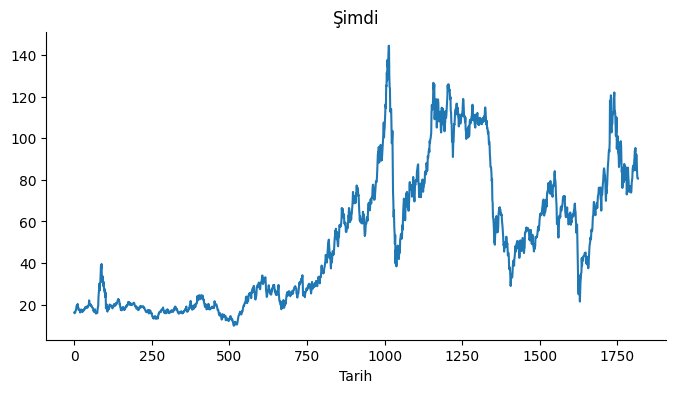

In [180]:
df['Şimdi'].plot(kind='line', figsize=(8, 4), title='Şimdi')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Tarih')


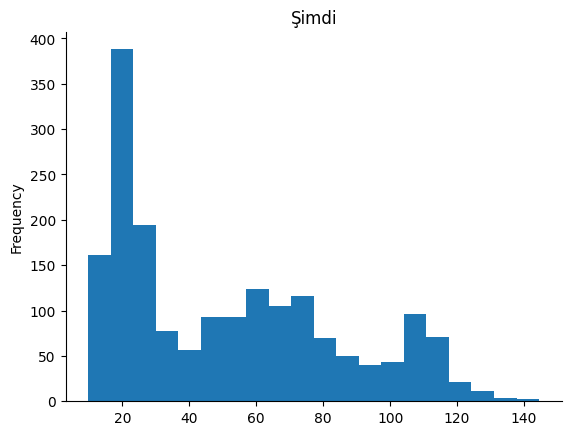

In [181]:
df['Şimdi'].plot(kind='hist', bins=20, title='Şimdi')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [182]:
df = df[['Tarih', 'Şimdi']]

df

,Tarih,Şimdi
0,1989-01-29,16.17
1,1989-02-05,15.82
2,1989-02-12,16.01
3,1989-02-19,16.15
4,1989-02-26,16.95
...,...,...
1812,2023-10-22,90.48
1813,2023-10-29,84.89
1814,2023-11-05,81.43
1815,2023-11-12,80.61


In [183]:
df.index = df.pop('Tarih')
df

,Şimdi
Tarih,
1989-01-29,16.17
1989-02-05,15.82
1989-02-12,16.01
1989-02-19,16.15
1989-02-26,16.95
...,...
2023-10-22,90.48
2023-10-29,84.89
2023-11-05,81.43


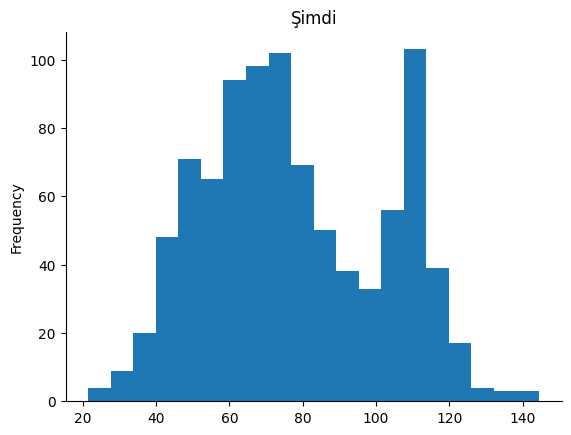

In [184]:
start_date = pd.to_datetime('2006-02-26', format='%Y-%m-%d')
df_after_start_date = df.loc[start_date:, 'Şimdi']

df_after_start_date.plot(kind='hist', bins=20, title='Şimdi')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()


In [185]:
import numpy as np
import datetime

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = pd.to_datetime(first_date_str, format='%Y.%m.%d')
  last_date  = pd.to_datetime(last_date_str, format='%Y.%m.%d')

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Şimdi'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2015-01-11'
windowed_df = df_to_windowed_df(df,
                                pd.to_datetime('2006-02-26',format='%Y.%m.%d'),
                                pd.to_datetime('2023-11-19',format='%Y.%m.%d'),
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2006-02-26,59.64,59.89,62.60,64.18
1,2006-03-05,59.89,62.60,64.18,60.83
2,2006-03-12,62.60,64.18,60.83,63.26
3,2006-03-19,64.18,60.83,63.26,63.51
4,2006-03-26,60.83,63.26,63.51,65.91
...,...,...,...,...,...
921,2023-10-22,84.58,90.89,92.16,90.48
922,2023-10-29,90.89,92.16,90.48,84.89
923,2023-11-05,92.16,90.48,84.89,81.43
924,2023-11-12,90.48,84.89,81.43,80.61


In [186]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((926,), (926, 3, 1), (926,))

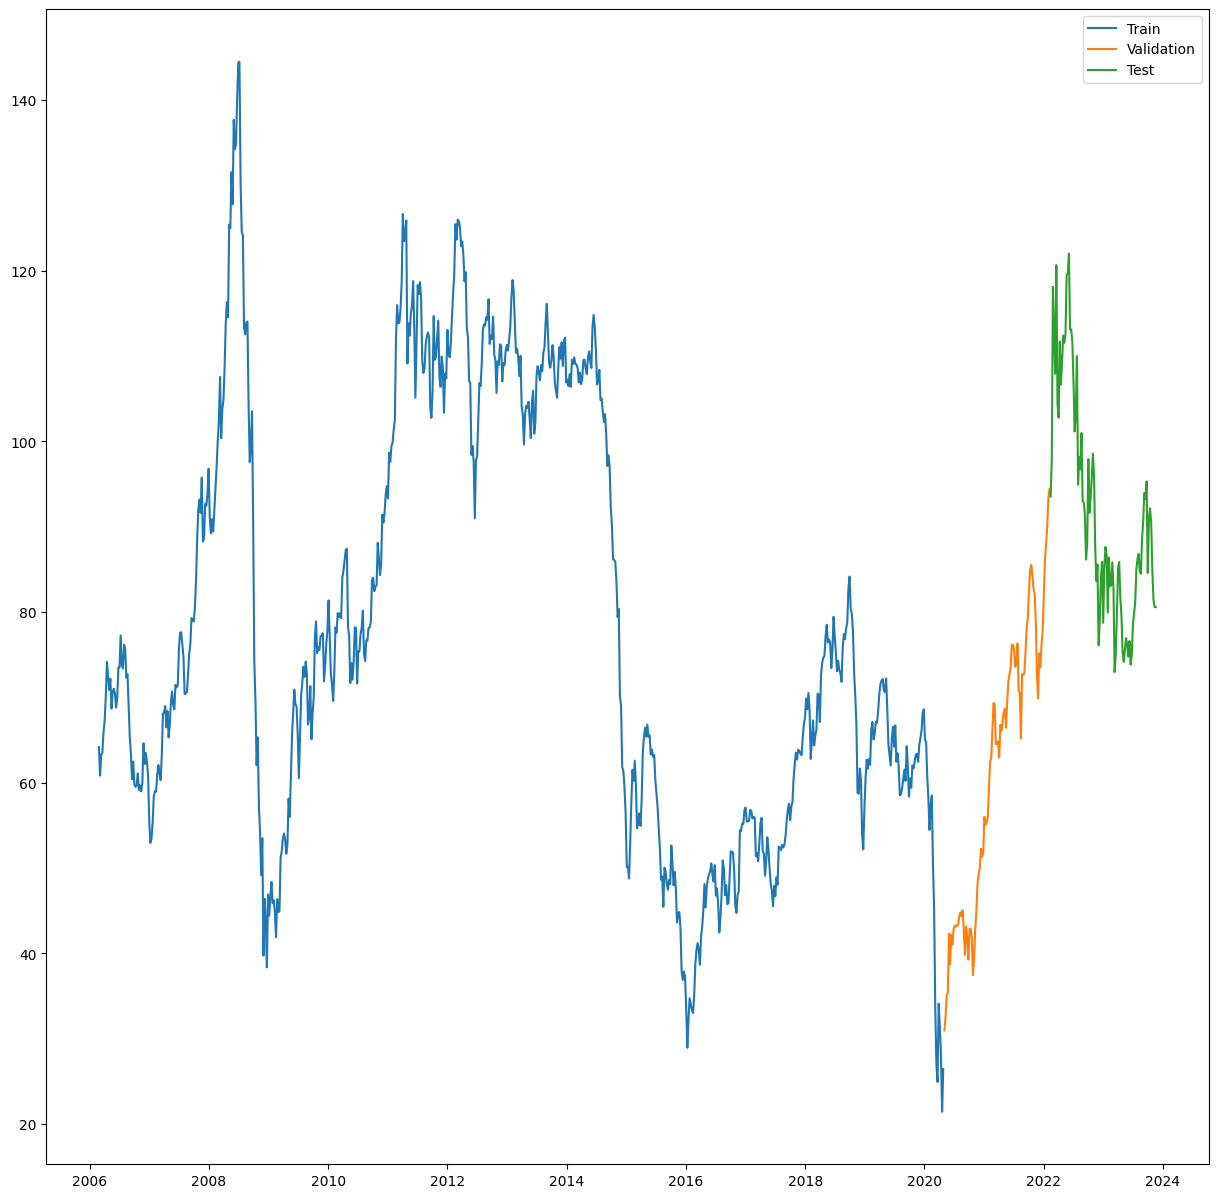

In [187]:
q_80 = int(len(dates) * .80)
q_90 = int(len(dates) * .90)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize=(15, 15))
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [188]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras.layers import Dense,Dropout

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    Dropout(0.2),
                    layers.Dense(32, activation='relu'),
                    Dropout(0.2),
                    layers.Dense(32, activation='relu'),
                    Dropout(0.2),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

cıktı=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)



Epoch 1/100
24/24 [==============================] - 3s 23ms/step - loss: 6639.9795 - mean_absolute_error: 77.4771 - val_loss: 3827.9348 - val_mean_absolute_error: 59.6026
Epoch 2/100
24/24 [==============================] - 0s 6ms/step - loss: 6151.1338 - mean_absolute_error: 74.2239 - val_loss: 3164.3052 - val_mean_absolute_error: 53.5813
Epoch 3/100
24/24 [==============================] - 0s 6ms/step - loss: 4623.9302 - mean_absolute_error: 62.1297 - val_loss: 1087.4889 - val_mean_absolute_error: 27.4614
Epoch 4/100
24/24 [==============================] - 0s 7ms/step - loss: 1450.6835 - mean_absolute_error: 30.5232 - val_loss: 681.1246 - val_mean_absolute_error: 21.3220
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: 862.6616 - mean_absolute_error: 24.5675 - val_loss: 271.9495 - val_mean_absolute_error: 13.2796
Epoch 6/100
24/24 [==============================] - 0s 7ms/step - loss: 587.4951 - mean_absolute_error: 19.1112 - val_loss: 26.0508 - val_mean_abs

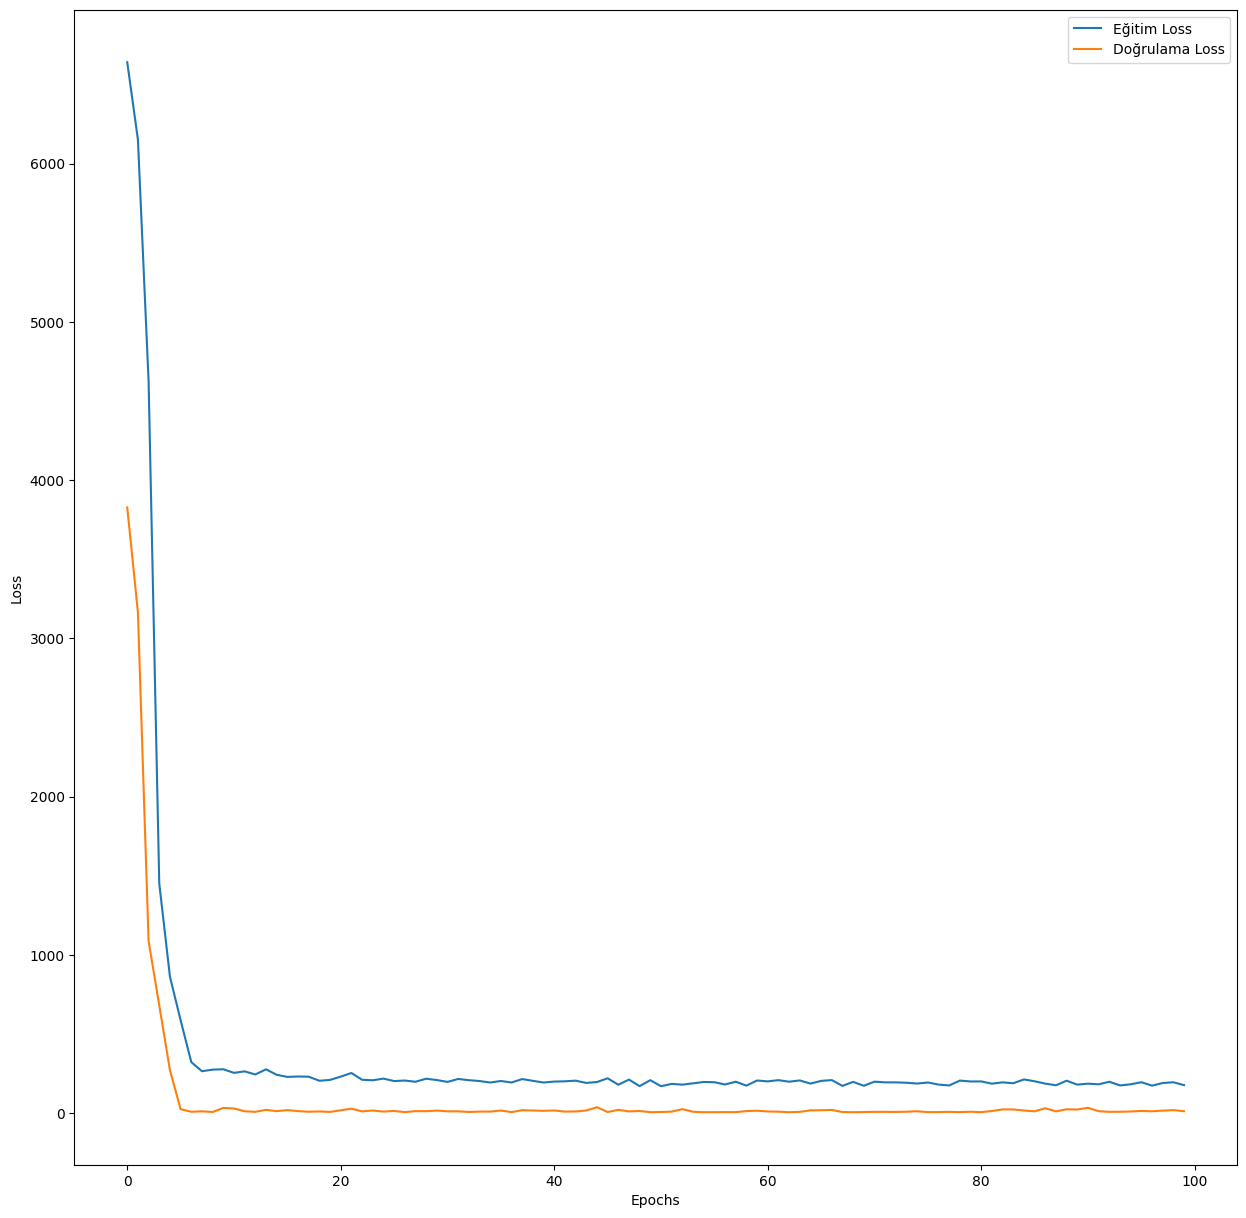

In [189]:
# Eğitim ve doğrulama kayıplarını görselleştirme
from sklearn.metrics import mean_absolute_error

plt.figure(figsize=(15, 15))
plt.plot(cıktı.history['loss'], label='Eğitim Loss')
plt.plot(cıktı.history['val_loss'], label='Doğrulama Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


24/24 [==============================] - 0s 2ms/step


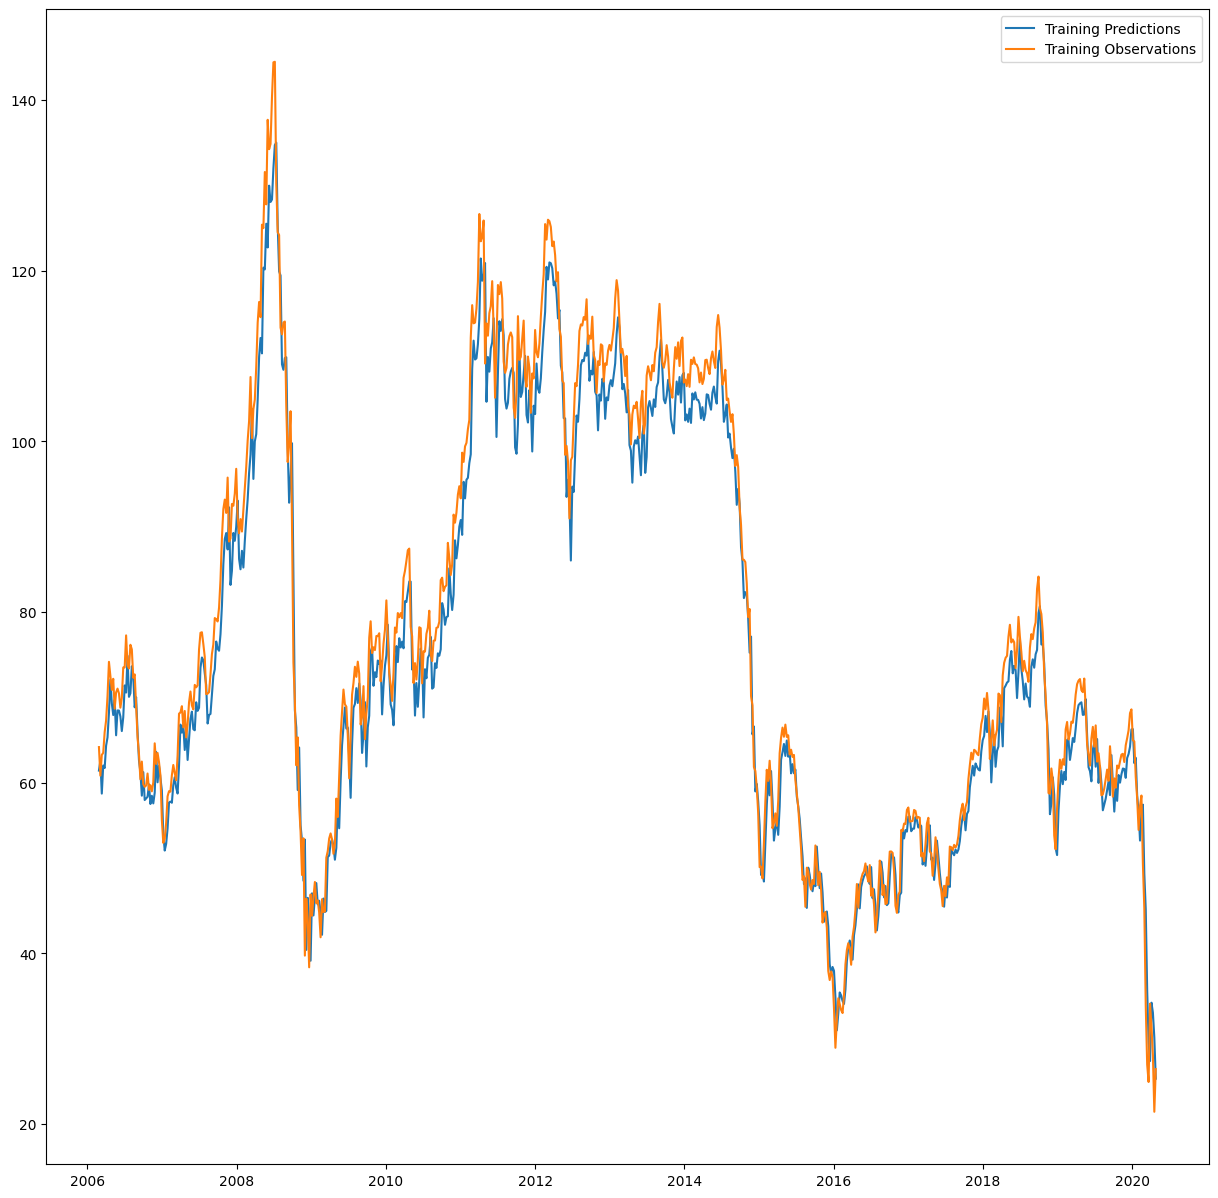

In [190]:
train_predictions = model.predict(X_train).flatten()

plt.figure(figsize=(15, 15))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

3/3 [==============================] - 0s 4ms/step


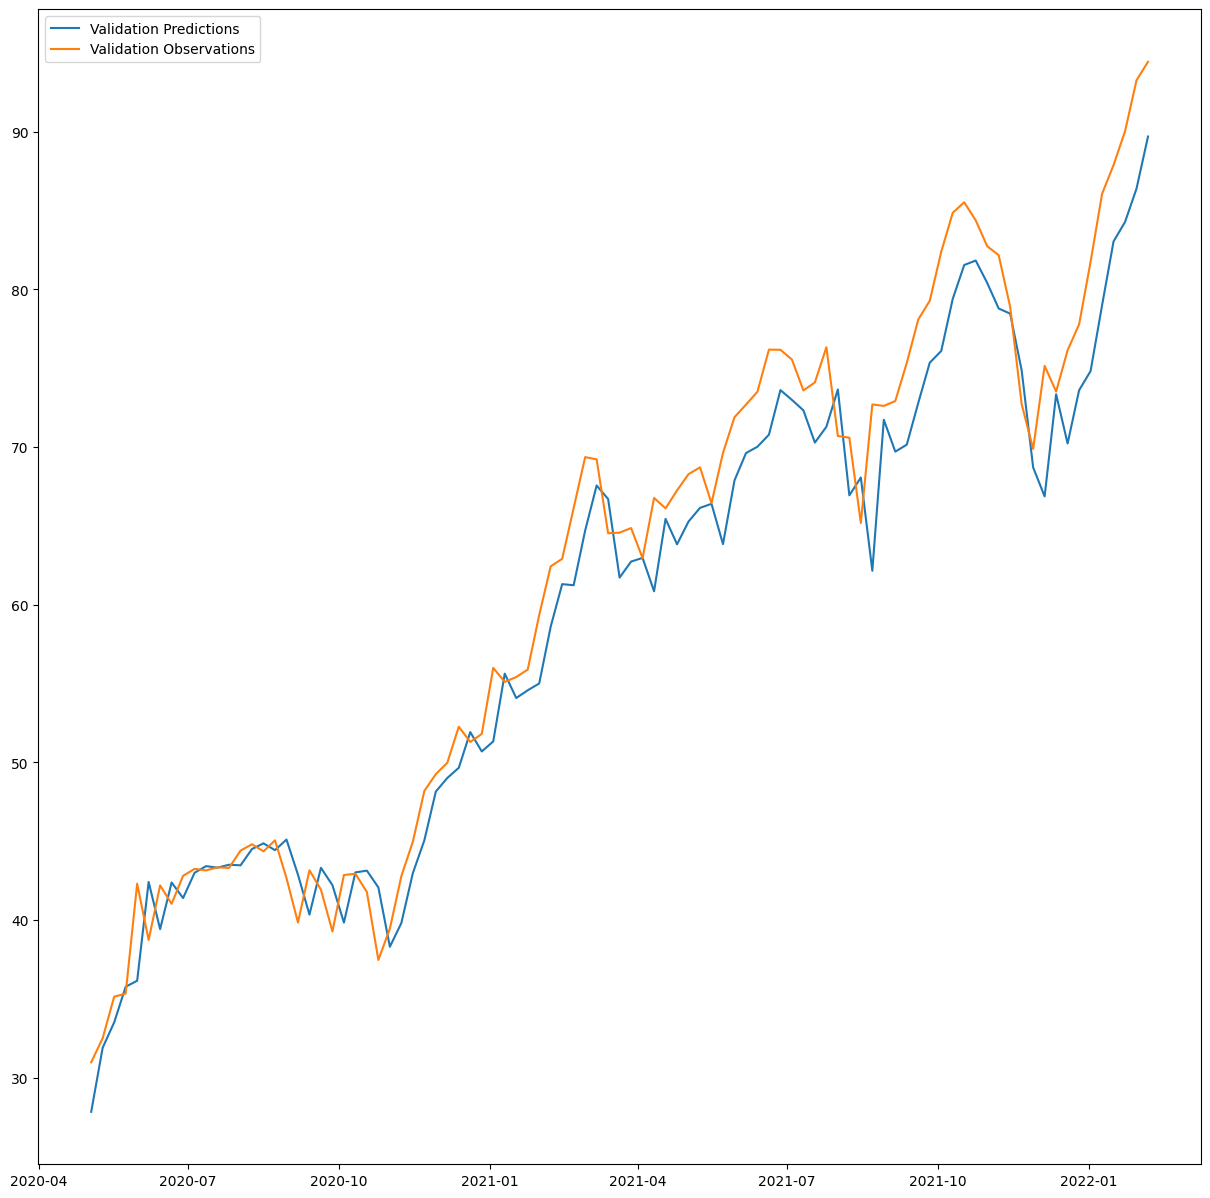

In [191]:
val_predictions = model.predict(X_val).flatten()

plt.figure(figsize=(15, 15))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

3/3 [==============================] - 0s 4ms/step


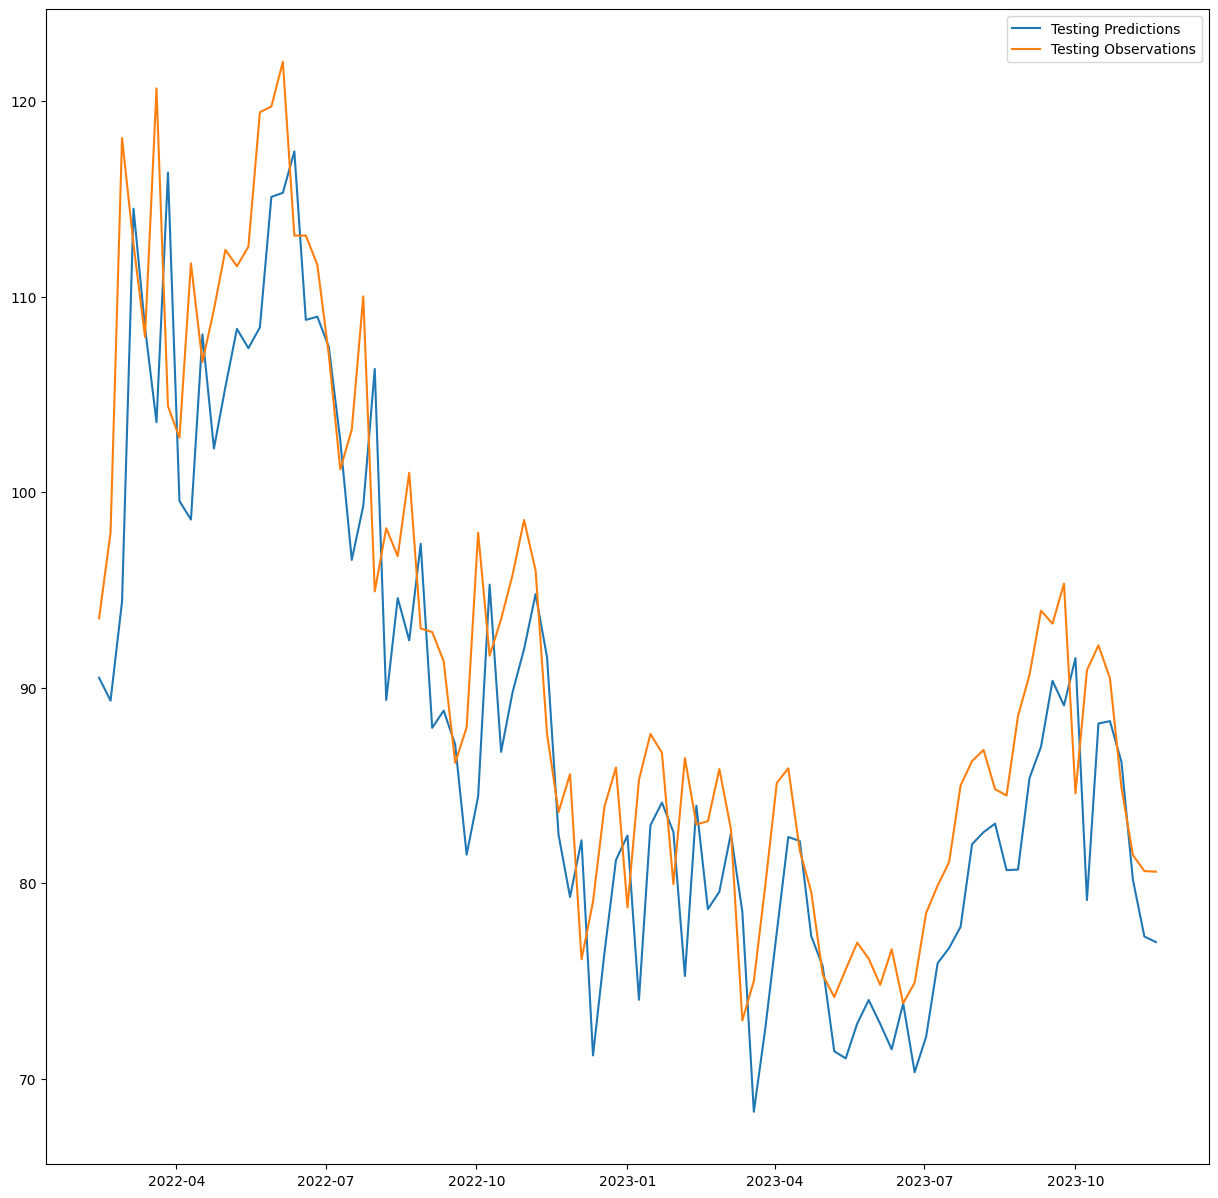

In [192]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(15, 15))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

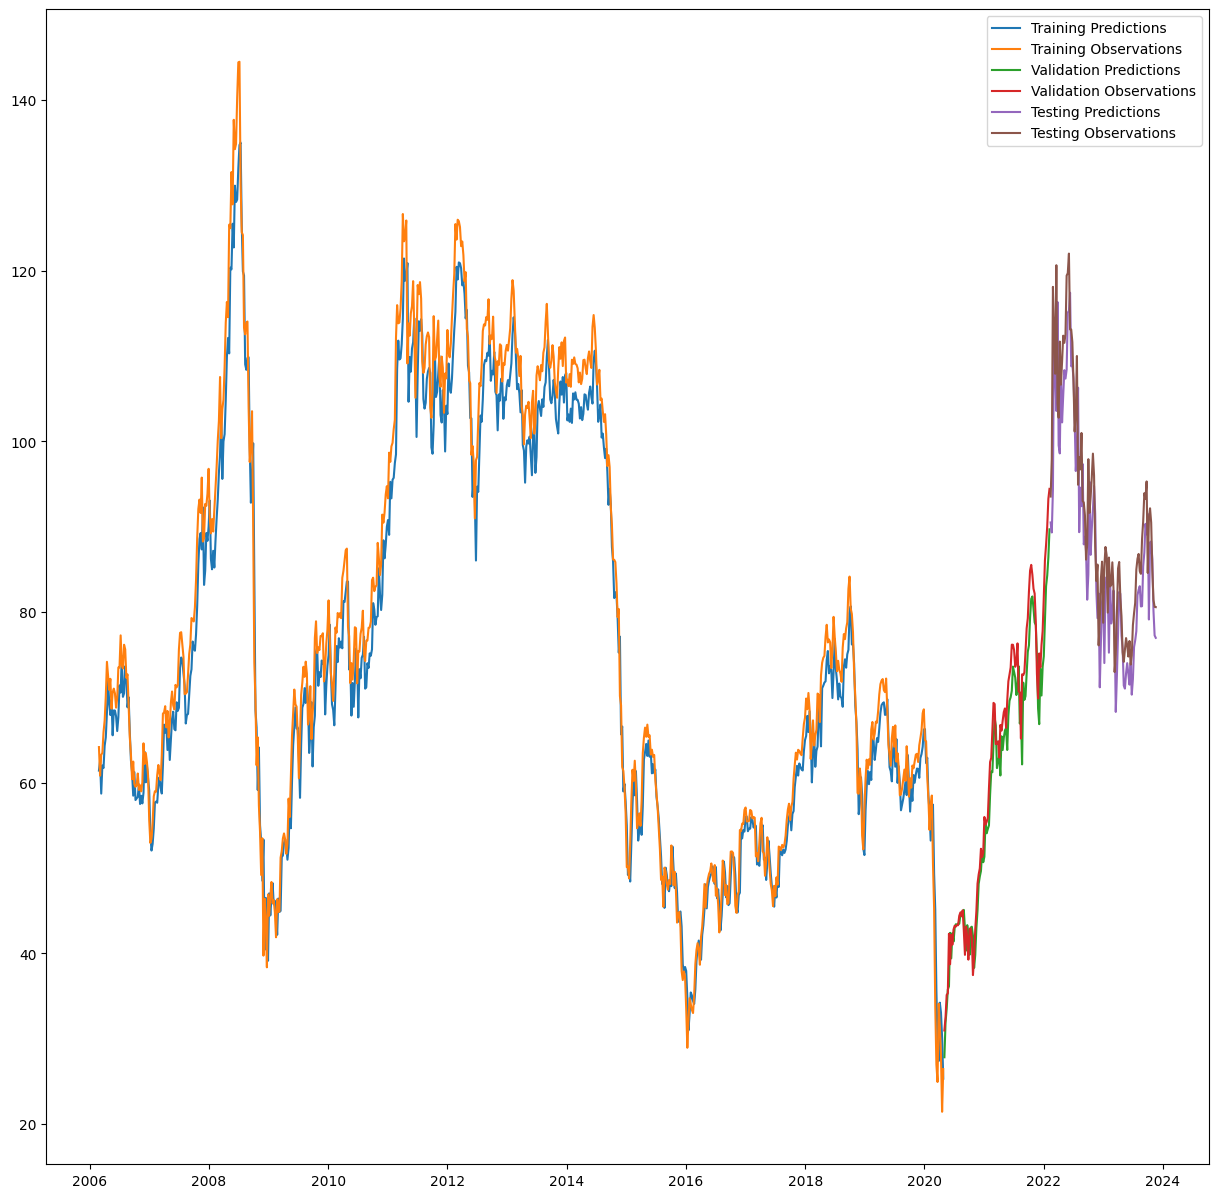

In [193]:
plt.figure(figsize=(15, 15))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

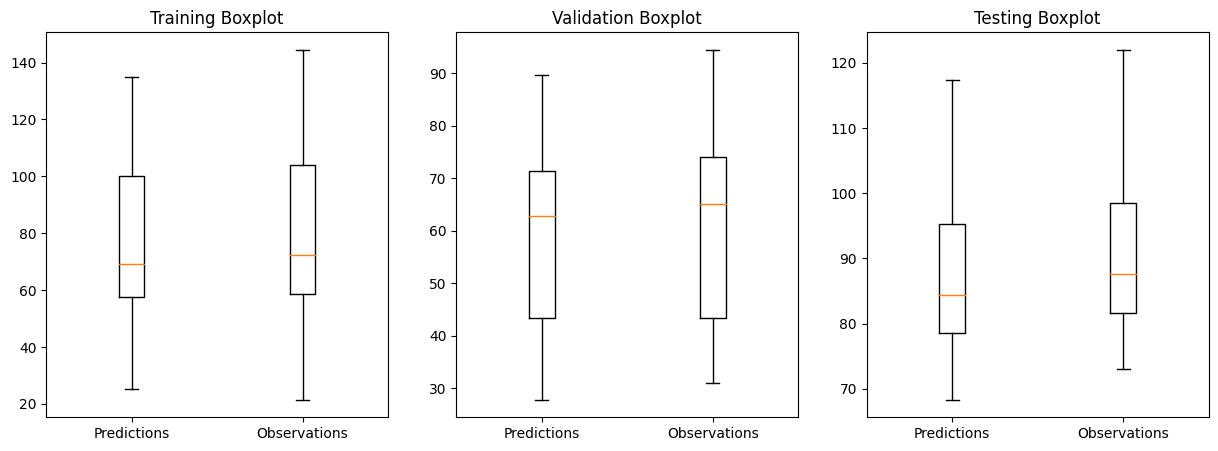

In [194]:
# Boxplot for Training
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.boxplot([train_predictions, y_train])
plt.title('Training Boxplot')
plt.xticks([1, 2], ['Predictions', 'Observations'])

# Boxplot for Validation
plt.subplot(1, 3, 2)
plt.boxplot([val_predictions, y_val])
plt.title('Validation Boxplot')
plt.xticks([1, 2], ['Predictions', 'Observations'])

# Boxplot for Testing
plt.subplot(1, 3, 3)
plt.boxplot([test_predictions, y_test])
plt.title('Testing Boxplot')
plt.xticks([1, 2], ['Predictions', 'Observations'])

plt.show()


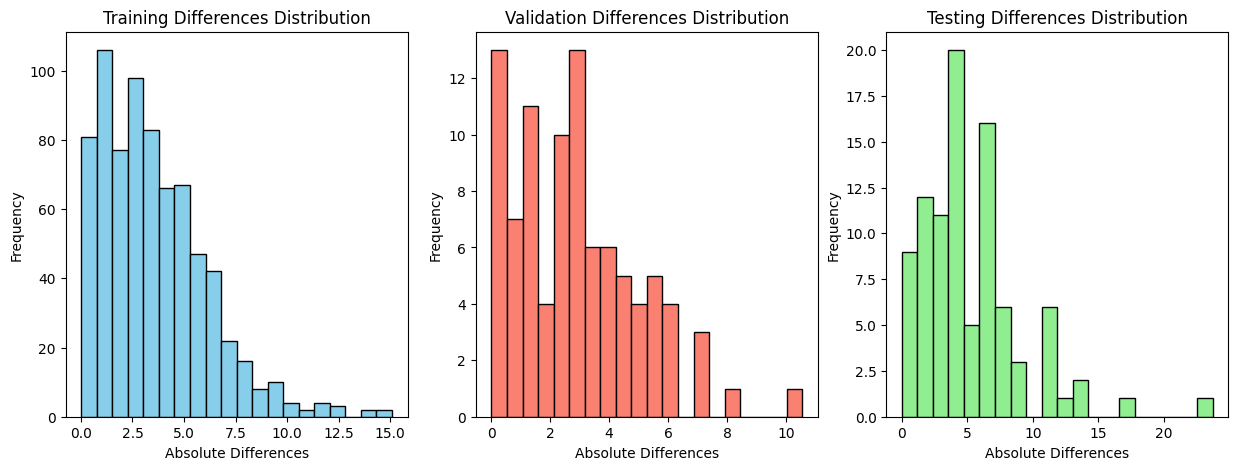

In [195]:
# Distribution plots for differences
plt.figure(figsize=(15, 5))

# Training
plt.subplot(1, 3, 1)
plt.hist(np.abs(train_predictions - y_train), bins=20, color='skyblue', edgecolor='black')
plt.title('Training Differences Distribution')
plt.xlabel('Absolute Differences')
plt.ylabel('Frequency')

# Validation
plt.subplot(1, 3, 2)
plt.hist(np.abs(val_predictions - y_val), bins=20, color='salmon', edgecolor='black')
plt.title('Validation Differences Distribution')
plt.xlabel('Absolute Differences')
plt.ylabel('Frequency')

# Testing
plt.subplot(1, 3, 3)
plt.hist(np.abs(test_predictions - y_test), bins=20, color='lightgreen', edgecolor='black')
plt.title('Testing Differences Distribution')
plt.xlabel('Absolute Differences')
plt.ylabel('Frequency')

plt.show()


In [196]:
from copy import deepcopy

recursive_predictions = []
recursive_dates=np.concatenate([dates_val, dates_test])

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction=model.predict(np.array([last_window[-3:]])).flatten()
    recursive_predictions.append(next_prediction)
    last_window=np.concatenate((last_window,[next_prediction]))




1/1 [==============================] - 0s 26ms/step


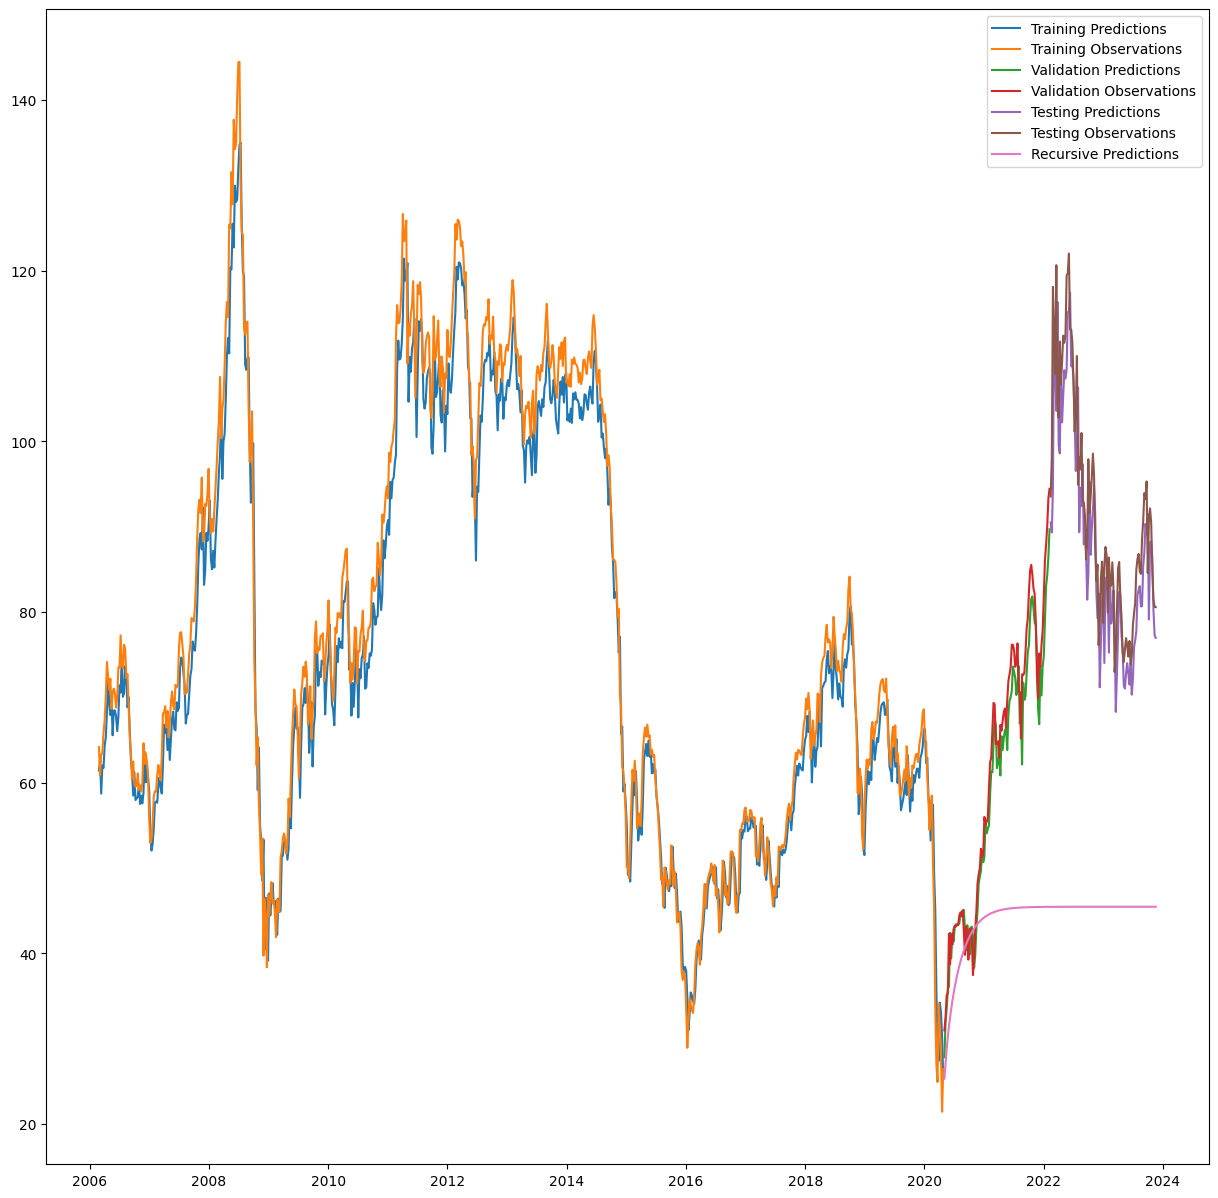

In [197]:

plt.figure(figsize=(15, 15))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])